In [5]:
import pandas as pd
from paintone_rsn.data_loading import load_subjectiid, exclusion, load_timeseries
from paintone_rsn.data_preproc import connectivity_matrix, connectivitylabelname
import paintone_rsn.mlfunctions as myml
from scipy.stats import pearsonr
import numpy as np
import pickle

In [2]:
# load behavior variables for the discovery sample
pathtodiscoversmpl="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/discovery_smpl/"
discovery_behav = pd.read_pickle("C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/discovery_smpl/discovery_smpl_behav.pkl")
discovery_behav.columns


Index(['meanFD', 'medianFD', 'maxFD', 'perc_scrubbed', 'age', 'fear_of_pain',
       'fear_of_tone', 'diff_fear', 'hpt', 'tt', 'y_valpainlearn_acq',
       'y_valtonelearn_acq', 'y_valpainlearn_ext', 'y_valtonelearn_ext',
       'y_paincont_acq', 'y_tonecont_acq', 'y_safetycont_acq',
       'y_paincont_ext', 'y_tonecont_ext', 'y_safetycont_ext',
       'hab_UCS_pain_vas', 'hab_UCS_tone_vas', 'PASS_D1', 'PASS_D2', 'PASS_D3',
       'PASS_D4', 'PCS', 'ADS', 'rcpl_score'],
      dtype='object')

In [3]:
# load included subjects' timeseries
s0_dict_subjID_idx = load_subjectiid(pathtodiscoversmpl+'subjectsIDs.txt')
s0_subjID_idx_incl, s0_subjID_idx_excl,s0_motioninf_curr = exclusion(pathtodiscoversmpl+'motion_summary.csv',
                                             dict_subjID_idx=s0_dict_subjID_idx,
                                             excl_subj=[8,18,31])
# Reason of exclusion
# -subj 8 felt asleep in the scanner
# -subj 18 - missing behavior data
# -subj 31 - missing mri data
timeseries_s0,\
labels,\
loadedsubjpath,\
vectorizedlabels,\
listoflabelpairs = load_timeseries(pathtodiscoversmpl+'regional_timeseries/',
                                   s0_subjID_idx_incl.values(),
                                   fddir=[pathtodiscoversmpl+"calculate_FD_Power/mapflow/"],
                                   numofexlcvolsatthebeg=0)
#calculate the connectivity matrix based on the timeseries and vectorize them
X, cm = connectivity_matrix(timeseries_s0)

# convert the connectivity matrix to a pandsa dataframe
s0_features_scr = pd.DataFrame(X,
            columns=(vectorizedlabels),
            index = s0_subjID_idx_incl.keys())

These are the subjects subjectID who were excluded:	dict_keys([4, 7, 8, 14, 16, 18, 22, 24, 25, 29, 36, 43, 44])
These are the subjects ordererID who were excluded:	dict_values([1, 3, 4, 7, 9, 11, 15, 17, 18, 21, 26, 33, 34])
These are the subjects subjectID who were included:	dict_keys([3, 5, 9, 12, 15, 17, 19, 20, 21, 23, 27, 28, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 45, 46, 47])
These are the subjects ordererID who were included:	dict_values([0, 2, 5, 6, 8, 10, 12, 13, 14, 16, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 35, 36, 37])
In total we work with	25	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):11
this is their subjID 	4	and this is thier orderID:	1
this is their subjID 	7	and this is thier orderID:	3
this is their subjID 	8	and this is thier orderID:	4
this is their subjID 	14	and this is thier orderID:	7
this is their subjID 	16	and this is thier orderID:

**** Non-nested analysis ****
** Best hyperparameters: {'fsel__k': 90, 'model__alpha': 10}
** Score on full data as training set:	-360.8048135701217
** Score on mean as model: -546.0096000000001
** Best Non-nested cross-validated score on test:	-590.2106555512053
XXXXX Explained Variance: -0.08095289084881507
**** Nested analysis ****
model	inner_cv mean score	outer vc score
{'fsel__k': 10, 'model__alpha': 0.1} -529.6838956553314 -1732.4058987976537
{'fsel__k': 190, 'model__alpha': 0.001} -587.4014366384774 -632.6661724549049
{'fsel__k': 125, 'model__alpha': 0.5} -591.0786739494383 -268.10125457177395
{'fsel__k': 165, 'model__alpha': 10} -615.3811215768479 -15.852509174334825
{'fsel__k': 140, 'model__alpha': 0.001} -595.0378646874284 -64.92062036940884
{'fsel__k': 40, 'model__alpha': 0.001} -558.2468643284124 -656.4254086705156
{'fsel__k': 100, 'model__alpha': 10} -615.9222422118396 -5.13524895944932
{'fsel__k': 140, 'model__alpha': 1} -600.4104612309552 -15.709893490040253
{'fsel__k':

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


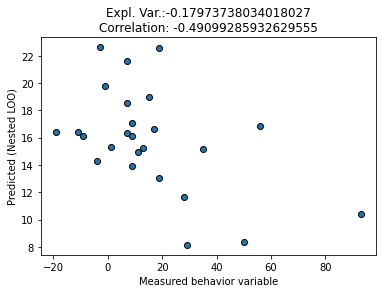

R2=0.534  R=0.731   p=0.000034  Expl. Var.: -8.1%  Expl. Var.2: -8.1%  MSE=590.211 RMSE=24.294  MAE=17.150 MedAE=13.422  R^2=-0.081


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


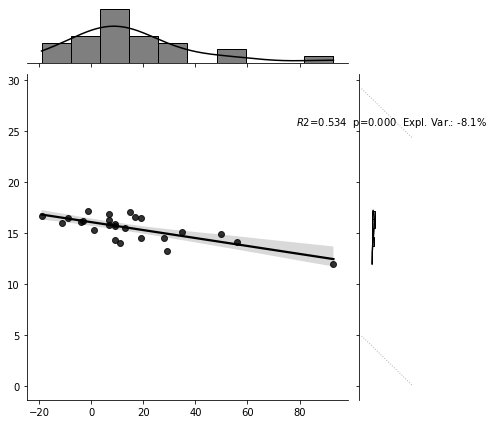

In [4]:
y_reg = discovery_behav['y_valtonelearn_acq'].to_numpy()
X_reg = s0_features_scr.to_numpy() #s0_features
mymodel, p_grid = myml.pipe_scale_fsel_ridge_noscaler()
m_scr, m_scr_predictedval, m0_scr_all_models, m0_scr_mycrossval, m0_scr_myfig, m0_scr_explvar, m0_scr_predicted = \
    myml.mytrain(X_reg,
                        y_reg,
                        mymodel,
                        p_grid, nested=True)
myprediction = myml.evaluate_crossval_prediction(m_scr,X_reg, y_reg,outfile=[])
discovery_behav['rcpl_score']=m_scr_predictedval


# Validation dataset 1

These are the subjects subjectID who were excluded:	dict_keys([5, 8, 10, 20, 25, 30, 32])
These are the subjects ordererID who were excluded:	dict_values([4, 7, 9, 19, 24, 29, 31])
These are the subjects subjectID who were included:	dict_keys([1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 33])
These are the subjects ordererID who were included:	dict_values([0, 1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 32])
In total we work with	26	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):5
this is their subjID 	5	and this is thier orderID:	4
this is their subjID 	8	and this is thier orderID:	7
this is their subjID 	10	and this is thier orderID:	9
this is their subjID 	20	and this is thier orderID:	19
this is their subjID 	25	and this is thier orderID:	24
this is their subjID 	30	and this is t

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


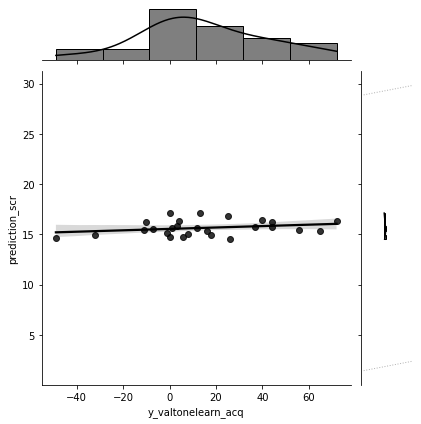

Number of pariticpants:26
p-value based on the predstat function(one-sided):0.09594888218625638
r2 based on the predstat function:0.06988018680807521
Observed pearson R: 0.26
and the corresponding p-value: 0.19
p-value based on permutation test: 0.0921908


In [6]:
pathtovalidationsmpl_1="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl1/"
vs1_dict_subjID_idx = load_subjectiid(pathtovalidationsmpl_1+'subjectsIDs.txt')
vs1_subjID_idx_incl, subjID_idx_excl,motioninf_curr = exclusion(pathtovalidationsmpl_1+'motion_summary.csv',
                                             dict_subjID_idx=vs1_dict_subjID_idx,
                                             excl_subj=[5,32]) #8,17,20,24,26,
# 5-felt asleep during the scan,but he is removed anyway bc of motion
# 32-incidental finding, registration does not work well
timeseries_vs1, \
labels, \
loadedsubjpath, \
vectorizedlabels, \
listoflabelpairs = load_timeseries(pathtovalidationsmpl_1+'regional_timeseries/',
                                   vs1_subjID_idx_incl.values(),
                                   fddir=[pathtovalidationsmpl_1+"calculate_FD_Power/mapflow/"],
                                   numofexlcvolsatthebeg=0)
X, cm = connectivity_matrix(timeseries_vs1)

vs1_features_scr = pd.DataFrame(X,
            columns=(vectorizedlabels),
            index = vs1_subjID_idx_incl.keys())

# load behavior data which was preprocessed with R
vs1_behav = pd.read_csv(pathtovalidationsmpl_1+'validation_smpl1_behav.csv', #allbehavdata.csv',
                         index_col=['sub'],
                          ).loc[vs1_subjID_idx_incl.keys(),:]

vs1_behav['prediction_scr']=m_scr.predict(vs1_features_scr.to_numpy())
# vs1_behav['prediction_scr_firstvolsexcl']=m0_scr_first5excl.predict(vs1_features_scr)
obsvar='y_valtonelearn_acq'
predvar='prediction_scr'
dataset=vs1_behav
myml.plot_prediction(dataset[obsvar],dataset[predvar])
p_value_myml, r_2_myml, residual, regline = myml.pred_stat(dataset[obsvar],
                                                           dataset[predvar],robust=False,
                                                           regside='greater')
print('Number of pariticpants:'+str(len(dataset)))
print('p-value based on the predstat function(one-sided):' + str(p_value_myml))
print('r2 based on the predstat function:' + str(r_2_myml))
print('Observed pearson R: %.2f' % pearsonr(dataset[obsvar],
                                            dataset[predvar])[0])
print('and the corresponding p-value: %.2f' % pearsonr(dataset[obsvar],
                                                       dataset[predvar])[1])


p_value_perm = myml.permutation_test(dataset[obsvar],
                                dataset[predvar],
                           method='approximate',
                           func=lambda x, y: np.corrcoef(x,y)[1][0],
                           num_rounds=10000,
                           seed=0)
print('p-value based on permutation test: %.7f' % p_value_perm)

# Validation dataset 2

These are the subjects subjectID who were excluded:	dict_keys([1049, 1092, 1093, 1113, 1117])
These are the subjects ordererID who were excluded:	dict_values([7, 18, 19, 25, 26])
These are the subjects subjectID who were included:	dict_keys([1015, 1022, 1029, 1032, 1037, 1039, 1048, 1053, 1055, 1060, 1066, 1067, 1074, 1076, 1077, 1083, 1089, 1094, 1096, 1097, 1108, 1111, 1118])
These are the subjects ordererID who were included:	dict_values([0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 27])
In total we work with	23	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):5
this is their subjID 	1049	and this is thier orderID:	7
this is their subjID 	1092	and this is thier orderID:	18
this is their subjID 	1093	and this is thier orderID:	19
this is their subjID 	1113	and this is thier orderID:	25
this is their subjID 	1117	and this is thier orderID:	26

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


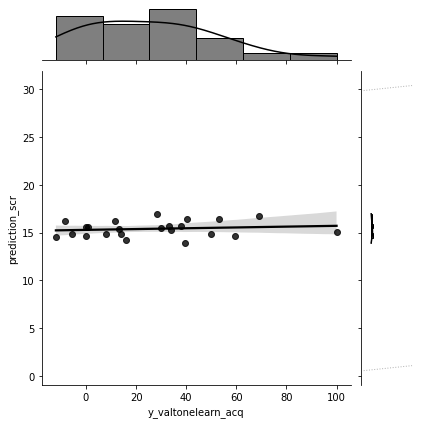

Number of pariticpants:23
p-value based on the predstat function(one-sided):0.25683446924039155
r2 based on the predstat function:0.02058714409816771
Observed pearson R: 0.14
and the corresponding p-value: 0.51
p-value based on permutation test: 0.2358764


In [7]:
pathtovalidationsmpl_2="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl2/"
dict_subjID_idx_vs2 = load_subjectiid(pathtovalidationsmpl_2+'subjectsIDs.txt')
subjID_idx_incl_vs2, subjID_idx_excl_vs2, motioninf_vs2 = exclusion(pathtovalidationsmpl_2+'motion_summary.csv',
                                             dict_subjID_idx=dict_subjID_idx_vs2,
                                             excl_subj=[])
# consider removing subj
timeseries_vs2, \
labels_vs2, \
loadedsubjpath_vs2, \
vectorizedlabels_vs2, \
listoflabelpairs_vs2 = load_timeseries(pathtovalidationsmpl_2+'regional_timeseries/',
                                          subjID_idx_incl_vs2.values(),
                                          fddir=[pathtovalidationsmpl_2+"calculate_FD_Power/mapflow/"],
                                          numofexlcvolsatthebeg=0)

X_vs2, cm_vs2 = connectivity_matrix(timeseries_vs2)

vs2_features_scr= pd.DataFrame(X_vs2,
            columns=(vectorizedlabels_vs2),
            index = subjID_idx_incl_vs2.keys())


vs2_behav = pd.read_csv(pathtovalidationsmpl_2+'validation_smpl2_behav.csv',
                         index_col='VPN',
                          ).loc[subjID_idx_incl_vs2.keys(),:]
print('The current behavior variable set, which was preapred with R')
print(vs2_behav.columns)

# calculate derived valence rating for all participants.
# pain learning based on my definition in acquisition phase
vs2_behav['y_valpainlearn_acq']=\
    ((vs2_behav['CSVis_A_2']-vs2_behav['CSVis_A_0'])-\
    (vs2_behav['CSMinus_A_2']-vs2_behav['CSMinus_A_0']))/2
vs2_behav['y_valtonelearn_acq']=\
    ((vs2_behav['CSAud_A_2']-vs2_behav['CSAud_A_0'])-\
    (vs2_behav['CSMinus_A_2']-vs2_behav['CSMinus_A_0']))/2
#checking this publication(https://www.nature.com/articles/s42003-021-02008-1#Sec9) in which the study 2 is part of Robert's shared data
# They had the extinction on a separate day, and they measured valence right before extiction. We can use that as well.
vs2_behav['y_valpainlearn_lastacq_ext']=\
    ((vs2_behav['CSVis_E_2']-vs2_behav['CSVis_A_2'])-\
    (vs2_behav['CSMinus_E_2']-vs2_behav['CSMinus_A_2']))/2
vs2_behav['y_valtonelearn_lastacq_ext']=\
    ((vs2_behav['CSAud_E_2']-vs2_behav['CSAud_A_2'])-\
    (vs2_behav['CSMinus_E_2']-vs2_behav['CSMinus_A_2']))/2

vs2_behav['y_valpainlearn_proper_ext']=\
    ((vs2_behav['CSVis_E_2']-vs2_behav['CSVis_E_0'])-\
    (vs2_behav['CSMinus_E_2']-vs2_behav['CSMinus_E_0']))/2
vs2_behav['y_valtonelearn_proper_ext']=\
    ((vs2_behav['CSAud_E_2']-vs2_behav['CSAud_E_0'])-\
    (vs2_behav['CSMinus_E_2']-vs2_behav['CSMinus_E_0']))/2




vs2_behav['prediction_scr']=m_scr.predict(vs2_features_scr.to_numpy())

obsvar='y_valtonelearn_acq'
predvar='prediction_scr'
dataset=vs2_behav
myml.plot_prediction(dataset[obsvar],dataset[predvar])
p_value_myml, r_2_myml, residual, regline = myml.pred_stat(dataset[obsvar],
                                                           dataset[predvar],robust=False,
                                                           regside='greater')
print('Number of pariticpants:'+str(len(dataset)))
print('p-value based on the predstat function(one-sided):' + str(p_value_myml))
print('r2 based on the predstat function:' + str(r_2_myml))
print('Observed pearson R: %.2f' % pearsonr(dataset[obsvar],
                                            dataset[predvar])[0])
print('and the corresponding p-value: %.2f' % pearsonr(dataset[obsvar],
                                                       dataset[predvar])[1])


p_value_perm = myml.permutation_test(dataset[obsvar],
                                dataset[predvar],
                           method='approximate',
                           func=lambda x, y: np.corrcoef(x,y)[1][0],
                           num_rounds=10000,
                           seed=0)
print('p-value based on permutation test: %.7f' % p_value_perm)